In [2]:
import numpy as np
# import matplotlib.pyplot as plt
import pandas as pd
from NeuralNet import NeuralNet

data = pd.read_csv("./data/train.csv")

In [3]:
print(data.head())
data = np.array(data)
m, n = data.shape
np.random.shuffle(data)

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [4]:
data_dev = data[0:1000].T
Y_dev = data_dev[0]
X_dev = data_dev[1:n] / 255.0
X_dev = X_dev.T

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n] / 255.0
X_train = X_train.T

Available Methods: ['gd', 'sgd', 'bgd']
Available Optimizers: ['sgd', 'adam', 'momentum', 'rmsprop', 'nesterov']
Available Decay Types: ['exponential_decay', 'step_decay', 'cyclic_decay']
Available Regularizations: ['none', 'l1', 'l2']
Available Gradient Clippers: ['none', 'norm', 'value']
Epoch 0, batch 0, Loss: 2.320206414738586
Epoch 0, batch 100, Loss: 0.5654582806496904
Epoch 0, batch 200, Loss: 0.2854911641401331
Epoch 0, batch 300, Loss: 0.1450495334692772
Epoch 0, batch 400, Loss: 0.2619356729517794
Epoch 0, batch 500, Loss: 0.1901472081823233
Epoch 0, batch 600, Loss: 0.33489732023032714
Epoch 1, batch 0, Loss: 0.1457813568232768
Epoch 1, batch 100, Loss: 0.2186601343541847
Epoch 1, batch 200, Loss: 0.07263657650133565
Epoch 1, batch 300, Loss: 0.11637620520445166
Epoch 1, batch 400, Loss: 0.06885063866518414
Epoch 1, batch 500, Loss: 0.16237570203153504
Epoch 1, batch 600, Loss: 0.19141169914806097
Epoch 2, batch 0, Loss: 0.07796780874960674
Epoch 2, batch 100, Loss: 0.093876

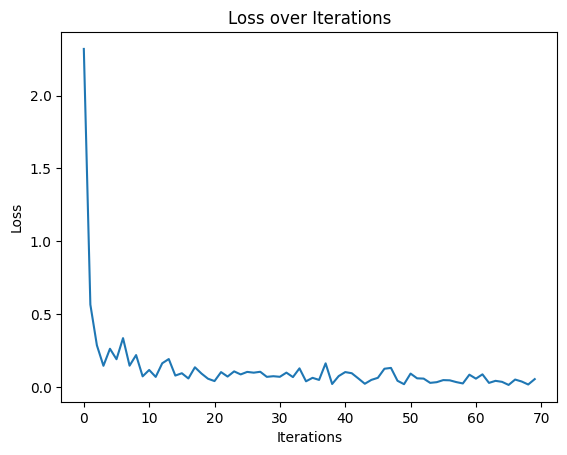

In [5]:
# layers[0] is input layer and layer[-1] is output

layers = [X_train.shape[1], 128, 64, 10]

# init method
model = NeuralNet(layers=layers)

#  Tells 
model.available_training_methods()
model.available_optimizers()
model.available_decay_types()
model.available_regularizations()
model.available_gradient_clippers()
model.set_training_method("batch_gradient_descent")
model.set_optimizer("adam")
model.set_decay_type("exponential_decay")
model.set_regularization("l2", reg_lambda=0.001)
model.set_gradient_clipper("norm", clip_value=1.0)

model.train(X_train, Y_train, lr=0.001, epochs=10, batch_size=64, log_interval=100)
model.plot_losses()

Epoch 0, batch 0, Loss: 2.5251691418061695
Epoch 0, batch 100, Loss: 0.4058899310479656
Epoch 0, batch 200, Loss: 0.215431457551722
Epoch 0, batch 300, Loss: 0.28961419292882506
Epoch 0, batch 400, Loss: 0.3000364677028717
Epoch 0, batch 500, Loss: 0.2089003836239706
Epoch 0, batch 600, Loss: 0.26975410652844156
Epoch 1, batch 0, Loss: 0.2690535272524493
Epoch 1, batch 100, Loss: 0.15620558300671628
Epoch 1, batch 200, Loss: 0.09647914175287933
Epoch 1, batch 300, Loss: 0.08375284900619004
Epoch 1, batch 400, Loss: 0.22680876306816555
Epoch 1, batch 500, Loss: 0.27482207430596295
Epoch 1, batch 600, Loss: 0.09552361607660516
Epoch 2, batch 0, Loss: 0.07214214431588897
Epoch 2, batch 100, Loss: 0.07638064291347932
Epoch 2, batch 200, Loss: 0.17640263781537036
Epoch 2, batch 300, Loss: 0.1333876495770798
Epoch 2, batch 400, Loss: 0.14211556777622375
Epoch 2, batch 500, Loss: 0.08083267403679512
Epoch 2, batch 600, Loss: 0.17399298027317237
Epoch 3, batch 0, Loss: 0.12789031837160175
Epoc

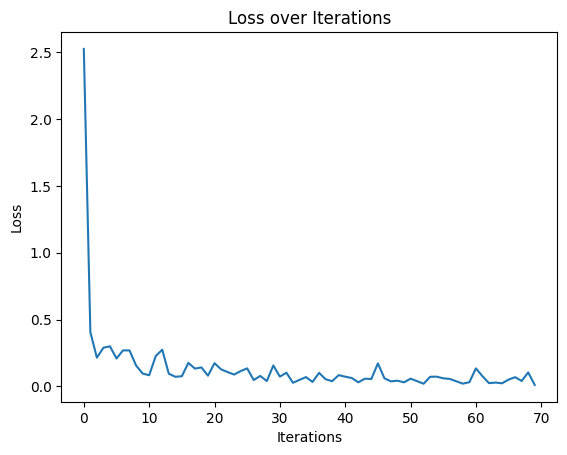

In [10]:
model1 = NeuralNet(layers=layers, init_method="he", training_method="bgd", optimizer="adam", lr_scheduler="exponential_decay", regularization="l2", reg_lambda=0.001, gradient_clipper="norm", clip_value=1.0)

model1.train(X_train, Y_train, lr=0.001, epochs=10, batch_size=64, log_interval=100)
model1.evaluate(X_train, Y_train)
model1.plot_losses()

In [11]:
model.evaluate(X_train, Y_train)
model.evaluate(X_dev, Y_dev)

Test Accuracy: 0.991780487804878
Test Accuracy: 0.979


In [12]:
model1.evaluate(X_train, Y_train)
model1.evaluate(X_dev, Y_dev)

Test Accuracy: 0.9904878048780488
Test Accuracy: 0.973


In [13]:
model.test_predictions(15,X_dev, Y_dev)

Model Prediction: 6
True Label: 6
